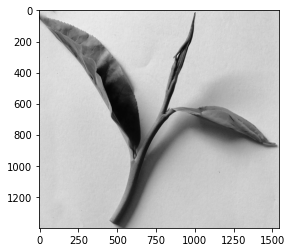

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
 
DATADIR = "/content/drive/MyDrive/Low/Fresh"
 
CATEGORIES = ["Below Best", "Best", "Poor"]
 
for category in CATEGORIES:  # do below best, best poor
    path = os.path.join(DATADIR,category)  # create path to below best, best and poor
    for img in os.listdir(path):  # iterate over each image per below best, best and poor
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray') 
        plt.show()  
 
        break  
    break

In [ ]:
print(img_array)

[[195 199 198 ... 190 188 189]
 [197 196 195 ... 188 186 186]
 [198 195 195 ... 186 186 186]
 ...
 [192 193 191 ... 189 192 193]
 [191 192 191 ... 192 192 195]
 [190 190 190 ... 187 186 184]]


In [ ]:
print(img_array.shape)

(1400, 1540)


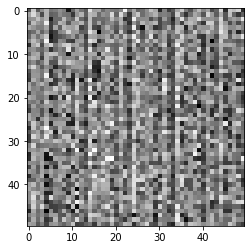

In [25]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

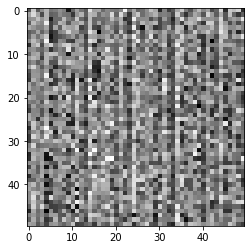

In [26]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [27]:
%matplotlib inline
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

# Fit on training set only.
img_array.data = scaler.fit_transform(img_array.data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Assigning the 'data' attribute is an inherently unsafe operation and will be removed in the future.
  after removing the cwd from sys.path.


In [29]:
pca = PCA(.95)

In [30]:
lower_dimensional_data = pca.fit_transform(img_array)

In [31]:
pca.n_components_

782

In [33]:
approximation = pca.inverse_transform(lower_dimensional_data)

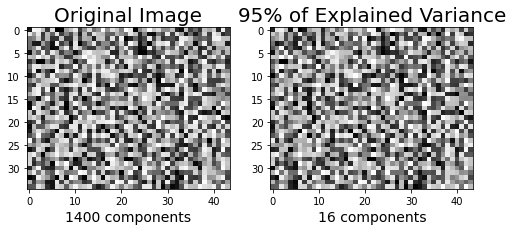

In [34]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(img_array[1].reshape(35,44),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('1400 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 16 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(35, 44),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('16 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

In [35]:
pca = PCA()

In [36]:
pca.fit(img_array)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca.n_components_

1400

In [39]:
# Summing explained variance
tot = sum(pca.explained_variance_)
tot

8174262.534880525

In [40]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[12.052986352377397, 1.3080111323329573, 1.2585368051983168, 1.2358859543142962, 1.2133023750679532]


In [41]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

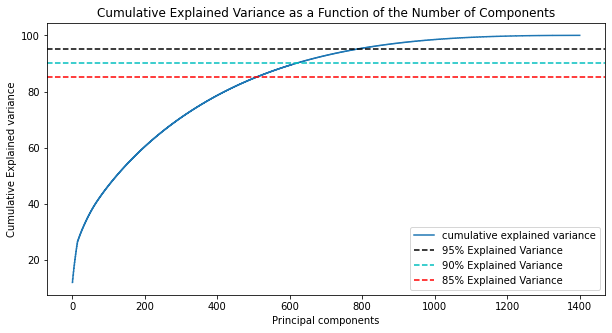

In [42]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 1401), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

In [43]:
# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [1400, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]

In [44]:
componentsVariance

[1400, 1057, 782, 617, 506]

In [46]:
from sklearn.decomposition import PCA


def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

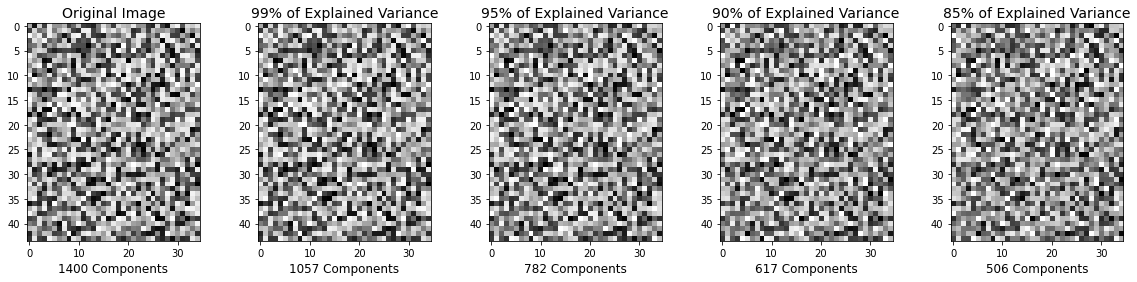

In [48]:
plt.figure(figsize=(20,4));

# Original Image (1400 components)
plt.subplot(1, 5, 1);
plt.imshow(img_array[5].reshape(44,35),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('1400 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 1057 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, img_array)[5].reshape(44, 35),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('1057 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 782 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, img_array)[5].reshape(44, 35),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('782 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 617 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, img_array)[5].reshape(44, 35),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('617 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 506 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, img_array)[5].reshape(44, 35),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('506 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);